In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import numpy as np

import utils.tavr_torch as tavr_torch
from utils.tavr_torch import TAVR_3_Frame, TAVR_1_Frame, tavr_dataloader
from utils.visualization import display_grid, z_stretch, visualize_frame

Training directory found, 29 series
Validation directory found, 1 series
Testing directory found, 0 series


torch.Size([77, 256, 256])


/home/shared/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


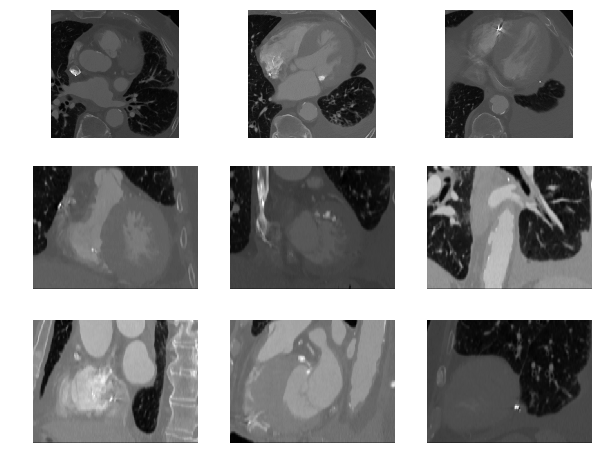

In [4]:
train = TAVR_3_Frame("__train")
a, b, c = train[18]
print(c.shape)
visualize_frame(c)

In [5]:
dl = tavr_torch.tavr_dataloader(train, batch_size=8, shuffle=True, num_workers=4)
dataiter = iter(dl)

valid = TAVR_3_Frame("__valid")
val_loader = tavr_torch.tavr_dataloader(valid, batch_size=8, shuffle=False, num_workers=4)

In [6]:
A, B, C, D, max_z = dataiter.next()
print(A.shape, B.shape, C.shape, D.shape, max_z.shape)

torch.Size([8, 105, 256, 256]) torch.Size([8, 105, 256, 256]) torch.Size([8, 105, 256, 256]) torch.Size([8, 105, 256, 256]) torch.Size([8, 1, 1, 1])


In [10]:
max_z.type()

'torch.FloatTensor'

In [7]:
r = dataiter.next()
r = dataiter.next()
r = dataiter.next()
r = dataiter.next()
r = dataiter.next()
r = dataiter.next()
r = dataiter.next()
r = dataiter.next()

In [8]:
for batch in val_loader:
    print(len(batch[0]))
print(len(valid))

8
8
2
18


In [ ]:
train_ = TAVR_1_Frame('__train')
len(train_)
maxi = 0
mini = 10000
for i in range(len(train_)):
    maxi = max(maxi, np.max(train_[i]))
    mini = min(mini, np.min(train_[i]))
print(maxi, mini)